In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.shape

(768, 9)

In [4]:
len(df)

768

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<AxesSubplot:xlabel='Glucose', ylabel='count'>

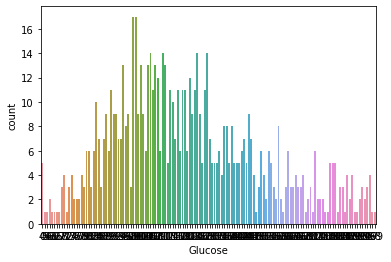

In [6]:
sns.countplot(x='Glucose',data=df)

In [7]:
df["Glucose"].value_counts()

99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
from sklearn.linear_model import Lasso

In [10]:
X = df.drop("Glucose", axis=1).values
y = df["Glucose"].values

In [11]:
X.shape, y.shape

((768, 8), (768,))

In [12]:
Names = df.drop("Glucose", axis=1).columns

In [13]:
model_lasso = Lasso(alpha=0.01)

In [14]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

model_lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [15]:
model_lasso.fit(X, y).coef_

array([-0.46360421,  0.11789645, -0.28834191,  0.09015556,  0.3083453 ,
        1.60558957,  0.48422136, 24.99433261])

In [16]:
model_lasso.score(X_train, y_train)

0.34731847142323524

In [17]:
model_lasso.score(X_test, y_test)

0.3318680487793382

In [18]:
# Make predictions
y_preds = model_lasso.predict(X_test)

In [19]:
y_preds[:10]

array([121.48295518,  97.91893823, 104.35418223, 108.96273854,
       118.94986825, 130.20318882, 102.13546395, 111.04087148,
       115.55855105, 126.91019657])

In [21]:
from sklearn.model_selection import cross_val_score

# With cross-validation
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    model_lasso.fit(X_train, y_train)
    print(f"Model accuracy on test set: {model_lasso.score(X_test, y_test) * 100}%")
    print(f"Cross-validation score: {np.mean(cross_val_score(model_lasso, X, y, cv=5)) * 100}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 29.986372837598363%
Cross-validation score: 32.315837013746034%

Trying model with 20 estimators...
Model accuracy on test set: 29.986372837598363%
Cross-validation score: 32.315837013746034%

Trying model with 30 estimators...
Model accuracy on test set: 29.986372837598363%
Cross-validation score: 32.315837013746034%

Trying model with 40 estimators...
Model accuracy on test set: 29.986372837598363%
Cross-validation score: 32.315837013746034%

Trying model with 50 estimators...
Model accuracy on test set: 29.986372837598363%
Cross-validation score: 32.315837013746034%

Trying model with 60 estimators...
Model accuracy on test set: 29.986372837598363%
Cross-validation score: 32.315837013746034%

Trying model with 70 estimators...
Model accuracy on test set: 29.986372837598363%
Cross-validation score: 32.315837013746034%

Trying model with 80 estimators...
Model accuracy on test set: 29.986372837598363%
Cross-validation scor

In [25]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

r2_score(y_test, y_test_mean)

0.0

In [26]:
r2_score(y_test, y_test)

1.0

In [28]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds = model_lasso.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

20.608273226005597

In [29]:
df = pd.DataFrame(data={"actual values": y_test, 
                   "predictions": y_preds})

df

,actual values,predictions
0,98,121.074967
1,112,95.880516
2,108,105.518106
3,107,113.282161
4,136,120.167027
...,...,...
149,165,143.495966
150,77,105.041252
151,95,123.732042
152,146,153.920115


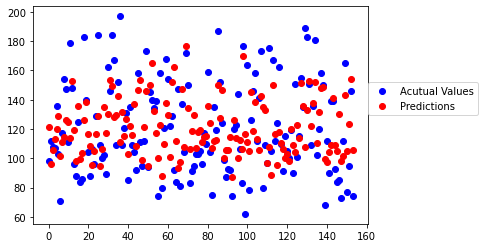

In [30]:
fig, ax = plt.subplots()
x = np.arange(0, len(df), 1)
ax.scatter(x, df["actual values"], c='b', label="Acutual Values")
ax.scatter(x, df["predictions"], c='r', label="Predictions")
ax.legend(loc=(1, 0.5));

In [31]:
# Mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)
mse

704.5534241584012

In [32]:
np.random.seed(42)
cv_acc = cross_val_score(model_lasso, X, y, cv=5)
cv_acc

array([0.36214713, 0.30887291, 0.3270006 , 0.25963374, 0.35813748])